<a href="https://colab.research.google.com/github/yegisafari/NNOptimizers/blob/main/myfinalAssignment3_deep_learning_yeganeh_safari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Assignment 3

#Yeganeh Safari

1. A study on neural network optimizers (Part 2). Here we use the actual optimizers
implemented in Keras to see how they behave on complicated functions. A list of such
functions of the form z = f (x, y) can be found here:
https://www.sfu.ca/~ssurjano/optimization.html
Complete the following tasks:

(a) Visualize some of the functions from the above link, in particular the Six hump camel
function and the Michalewicz function, but choose at least two more suitable functions
as well

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def six_hump_camel(x, y):
    # the Six hump camel function
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2


In [ ]:
def michalewicz(x, y):
    # the Michalewicz function
    m = 10
    return -np.sin(x) * np.sin(x**2 / np.pi) ** (2 * m) - np.sin(y) * np.sin(2 * y**2 / np.pi) ** (2 * m)


In [ ]:
def booth_function(x, y):
    # the Booth function
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

In [ ]:
def sphere_function(x, y):
    # the Sphere function
    return x**2 + y**2

In [ ]:
def himmelblau_function(x, y):
    # the Himmelblau function
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [ ]:
def rastrigin_function(x, y):
    # the Rastrigin function
    A = 10
    return 2 * A + x**2 - A * np.cos(2 * np.pi * x) + y**2 - A * np.cos(2 * np.pi * y)


In [ ]:
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

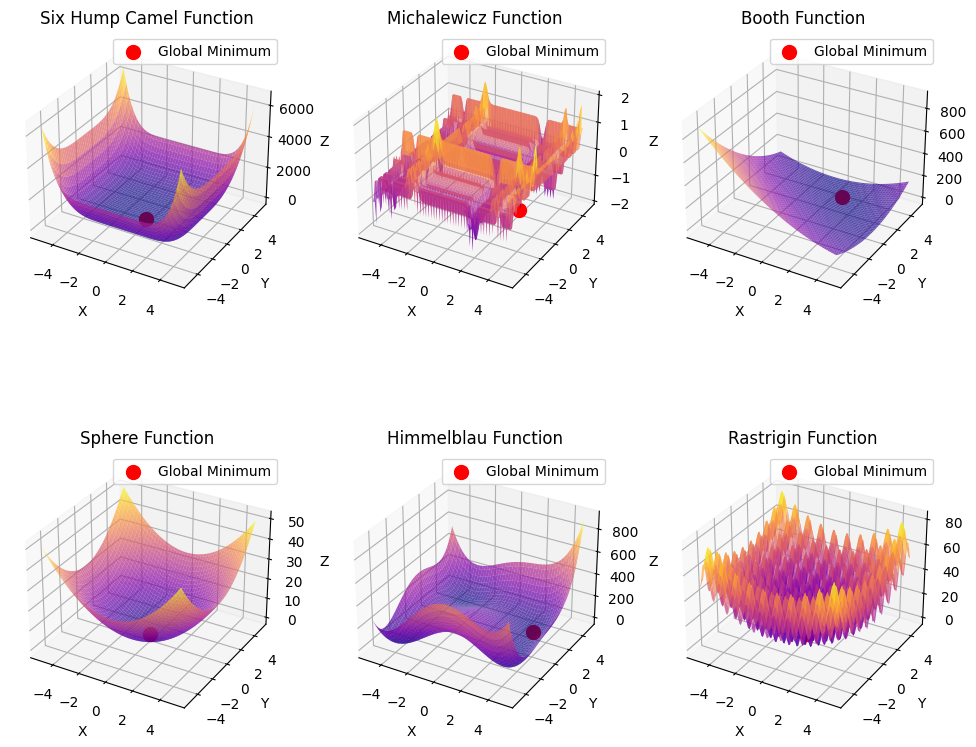

In [ ]:
# global minima for each function
global_minima = {
    'Six Hump Camel': np.array([0.0898, -0.7126]),
    'Michalewicz': np.array([2.20, 1.57]),
    'Booth': np.array([1, 3]),
    'Sphere': np.array([0, 0]),
    'Himmelblau': np.array([3, 2]),
    'Rastrigin': np.array([0, 0])
}

# Visualize the functions with global minima
fig = plt.figure(figsize=(12, 10))

for i, (func_name, function) in enumerate(zip(['Six Hump Camel', 'Michalewicz', 'Booth', 'Sphere', 'Himmelblau', 'Rastrigin'],
                                              [six_hump_camel, michalewicz, booth_function, sphere_function, himmelblau_function, rastrigin_function])):
    ax = fig.add_subplot(231 + i, projection='3d')
    ax.plot_surface(x_grid, y_grid, function(x_grid, y_grid), cmap='plasma', alpha=0.7)
    ax.scatter(*global_minima[func_name], function(*global_minima[func_name]), color='red', s=100, label='Global Minimum')
    ax.set_title(f'{func_name} Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

plt.show()


(b) Use Keras’ SGD optimizer, the vanilla momentum optimizer, the Nesterov accelerated
momentum optimizer, AdaGrad, RMSProp and Adam to find a minimum of these
functions. Then visualize the trajectory taken by the optimizer from a starting point
(xstart, ystart) to the minimum (xmin, ymin) of the considered function z = f (x, y). You
could visualize this both in 2D (i.e. projected to the plane spanned by p1 and p2) or
in 3D (i.e. visualizing the path along the loss surface itself taken by the optimizer).
An example of how this could look is given here:
(a) Two-dimensional projection of loss sur-
face and optimization paths.
(b) Three-dimensional loss surface and op-
timization paths.

In [ ]:
from scipy.optimize import minimize

In [ ]:
# the Six Hump Camel function
def six_hump_camel(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] + (-4 + 4 * x[1]**2) * x[1]**2

initial_guess = [0, 0]
result = minimize(six_hump_camel, initial_guess, method='SLSQP')
print("Global Minimum 1:", result.x)

# the second minimum
initial_guess = [1, 1]
result = minimize(six_hump_camel, initial_guess, method='SLSQP')
print("Global Minimum 2:", result.x)


Global Minimum 1: [0. 0.]
Global Minimum 2: [-0.08986698  0.71267079]


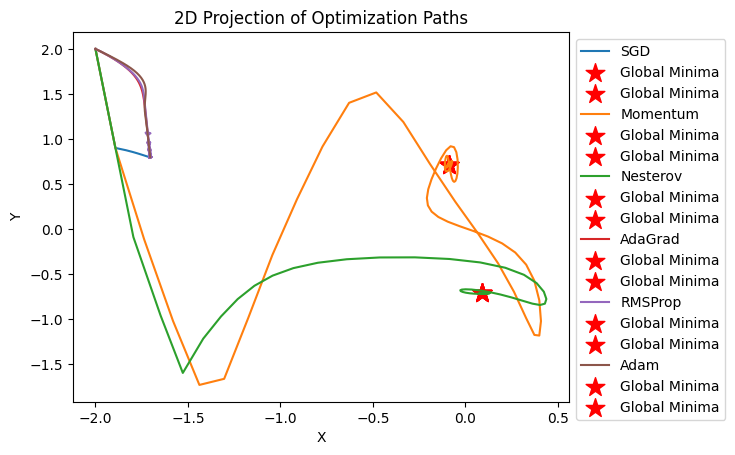

In [ ]:
# the Six Hump Camel function
def six_hump_camel(x, y):
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2

# the optimization function
def optimize_and_visualize_2d(optimizer, x_start, y_start, function, title, target_error=1e-13, max_steps=10000):
    x = tf.Variable(x_start, dtype=tf.float32)
    y = tf.Variable(y_start, dtype=tf.float32)
    x_values = []
    y_values = []
    z_values = []

    for step in range(max_steps):
        x_values.append(x.numpy())
        y_values.append(y.numpy())

        with tf.GradientTape() as tape:
            z = function(x, y)
            z_values.append(z.numpy())

        gradients = tape.gradient(z, [x, y])
        optimizer.apply_gradients(zip(gradients, [x, y]))

        if step > 0 and abs(z_values[-1] - z_values[-2]) < target_error:
            break

    x_min, y_min = x.numpy(), y.numpy()

    # Visualize the trajectory in 2D with global minima
    plt.plot(x_values, y_values, label=title)
    for minima in global_minima:
        plt.scatter(minima[0], minima[1], marker='*', s=200, color='red', label='Global Minima')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    return x_min, y_min

global_minima = [(0.0898, -0.7126), (-0.0898, 0.7126)]

# Optimizers
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
momentum_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
nesterov_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
adagrad_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

x_start, y_start = -2, 2

x_min_sgd, y_min_sgd = optimize_and_visualize_2d(sgd_optimizer, x_start, y_start, six_hump_camel, 'SGD')
x_min_momentum, y_min_momentum = optimize_and_visualize_2d(momentum_optimizer, x_start, y_start, six_hump_camel, 'Momentum')
x_min_nesterov, y_min_nesterov = optimize_and_visualize_2d(nesterov_optimizer, x_start, y_start, six_hump_camel, 'Nesterov')
x_min_adagrad, y_min_adagrad = optimize_and_visualize_2d(adagrad_optimizer, x_start, y_start, six_hump_camel, 'AdaGrad')
x_min_rmsprop, y_min_rmsprop = optimize_and_visualize_2d(rmsprop_optimizer, x_start, y_start, six_hump_camel, 'RMSProp')
x_min_adam, y_min_adam = optimize_and_visualize_2d(adam_optimizer, x_start, y_start, six_hump_camel, 'Adam')

plt.title('2D Projection of Optimization Paths')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Global Minimum 1: [0. 0.]
Global Minimum 2: [-0.08986698  0.71267079]
Optimizing with SGD optimizer


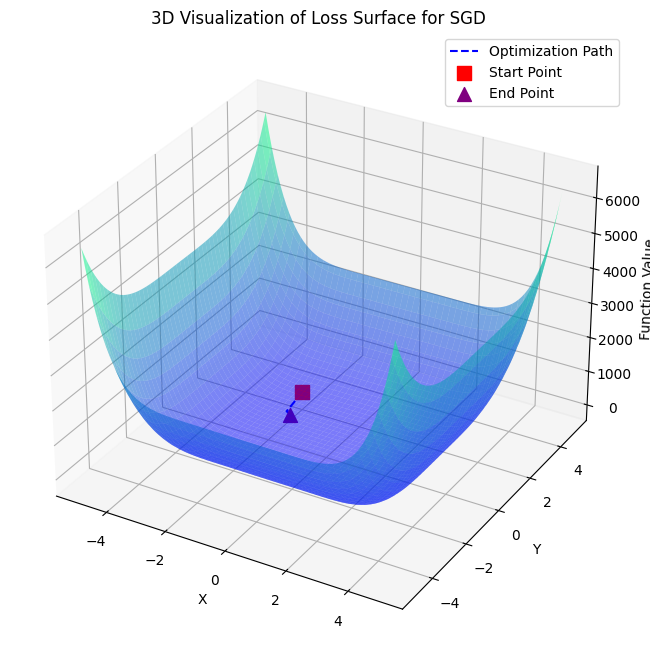

Optimizing with Momentum optimizer


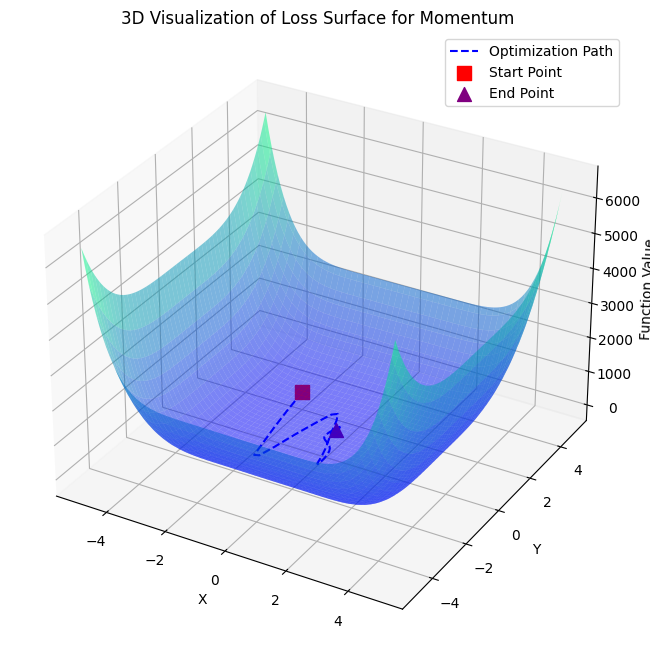

Optimizing with Nesterov optimizer


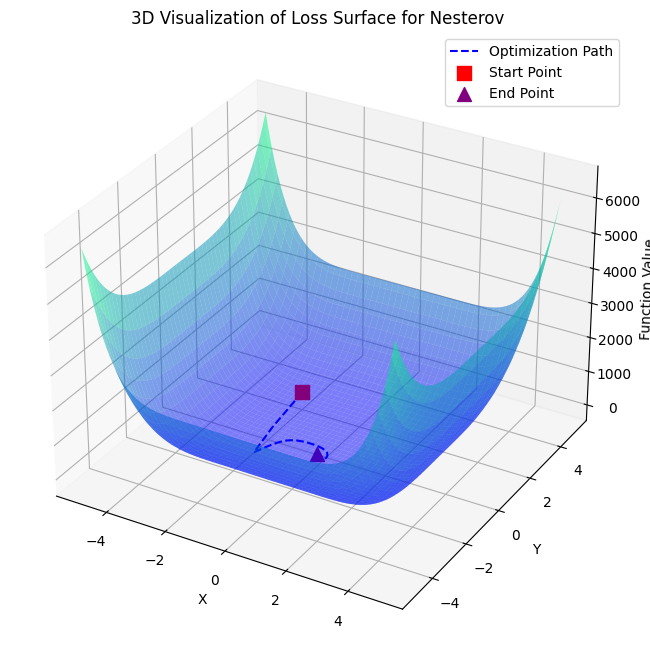

Optimizing with AdaGrad optimizer


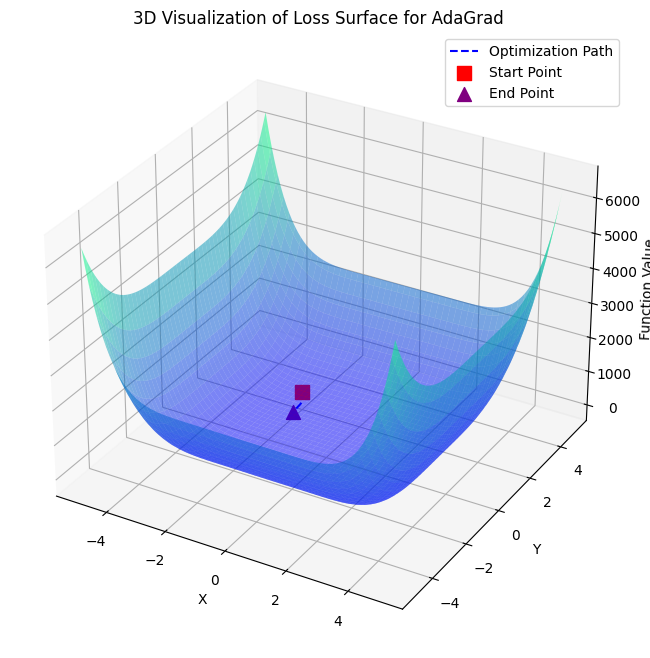

Optimizing with RMSProp optimizer


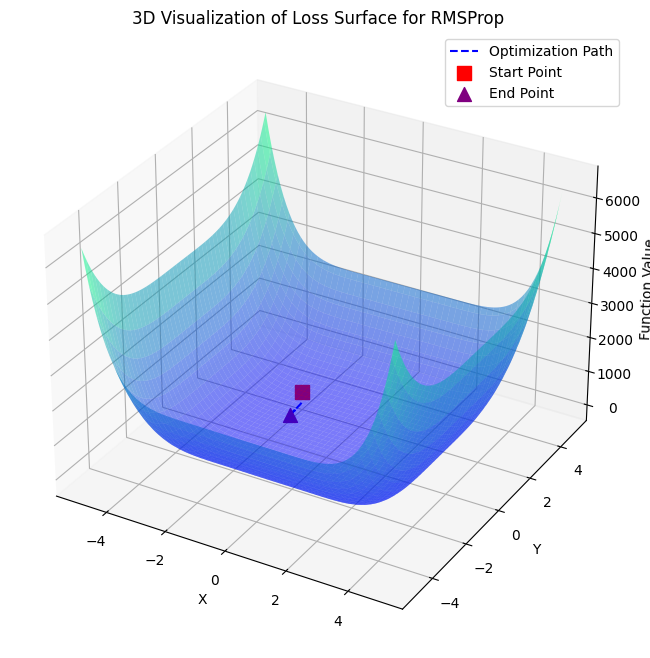

Optimizing with Adam optimizer


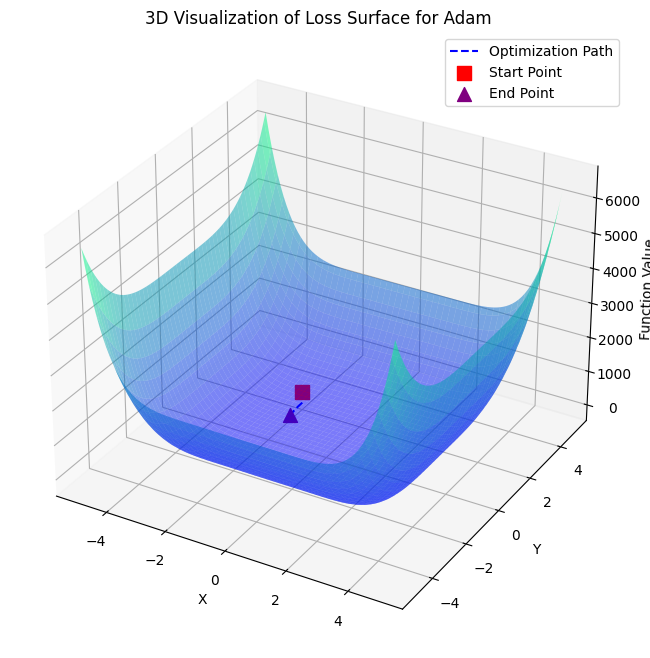

In [ ]:
# the Six Hump Camel function
def six_hump_camel(x, y):
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2

# the optimization function for visualization
def optimize_and_visualize_3d(optimizer, x_start, y_start, function, title, target_error=1e-13, max_steps=10000):
    x = tf.Variable(x_start, dtype=tf.float32)
    y = tf.Variable(y_start, dtype=tf.float32)
    z_values = []
    x_values = []
    y_values = []

    for step in range(max_steps):
        x_values.append(x.numpy())
        y_values.append(y.numpy())

        with tf.GradientTape() as tape:
            z = function(x, y)
            z_values.append(z)

        gradients = tape.gradient(z, [x, y])
        optimizer.apply_gradients(zip(gradients, [x, y]))

        if step > 0 and abs(z_values[-1] - z_values[-2]) < target_error:
            break

    x_min, y_min = x.numpy(), y.numpy()

    # Generate grid for visualization
    x_vals = np.linspace(-5, 5, 100)
    y_vals = np.linspace(-5, 5, 100)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    z_grid = function(x_grid, y_grid)

    # Three-dimensional visualization
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_grid, cmap='winter', alpha=0.5)
    ax.plot(x_values, y_values, z_values, 'b--', label='Optimization Path')
    ax.scatter(x_start, y_start, function(x_start, y_start), marker='s', s=100, color='red', label='Start Point')
    ax.scatter(x_min, y_min, function(x_min, y_min), marker='^', s=100, color='purple', label='End Point')

    ax.set_title(f'3D Visualization of Loss Surface for {title}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Function Value')
    ax.legend()
    plt.show()

    return x_min, y_min

# Optimizers
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
momentum_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
nesterov_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
adagrad_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# usage for each optimizer
optimizers = [
    (sgd_optimizer, 'SGD'),
    (momentum_optimizer, 'Momentum'),
    (nesterov_optimizer, 'Nesterov'),
    (adagrad_optimizer, 'AdaGrad'),
    (rmsprop_optimizer, 'RMSProp'),
    (adam_optimizer, 'Adam'),
]

x_start, y_start = -2, 2

result_global_min_1 = minimize(lambda x: six_hump_camel(x[0], x[1]), [0, 0], method='SLSQP')
result_global_min_2 = minimize(lambda x: six_hump_camel(x[0], x[1]), [1, 1], method='SLSQP')

global_min_1 = result_global_min_1.x
global_min_2 = result_global_min_2.x

print("Global Minimum 1:", global_min_1)
print("Global Minimum 2:", global_min_2)

for optimizer, name in optimizers:
    print(f'Optimizing with {name} optimizer')
    optimize_and_visualize_3d(optimizer, x_start, y_start, six_hump_camel, name)



(c) Indicate which optimizers fail to reach a minimum and which get stuck in a local
rather than the global minimum.

(d) Also keep track of the total number of steps each optimizer required to find a minimum
of the considered function. Use an absolute (target) error of 10−13 as a stopping
criterion, i.e. stop the minimization procedure when |f (xi, yi) − f (xi+1, yi+1)| 6 10−13
for two consecutive steps.
Hint: Note that some of the optimizers will not succeed in finding an appropriate min-
imum. As such, it may be required to limit the total number of optimization steps an
optimizer is allowed to take, after which the optimization procedure will be terminated
even if the target error was not reached. Set this maximum number of steps to a large
number, such as 100,000 or 1,000,000.
Hint: To solve this problem, you can use TensorFlow’s GradientTape method to compute
the two-dimensional gradient vector ∇f (xi, yi) of your function at the ith iteration, which
together with the two-dimensional solution vector (xi, yi) can then be passed into the
optimizer. In other words, this problem can be solved using a custom Keras training loop
where the variables are simply x and y


Optimizing function: six_hump_camel_function

Optimizer: SGD
Optimal values (x, y): -0.08954128 0.71262175
Minimum value of the objective function: -1.0316281
Total number of steps: 110
Optimizer reached the global minimum.


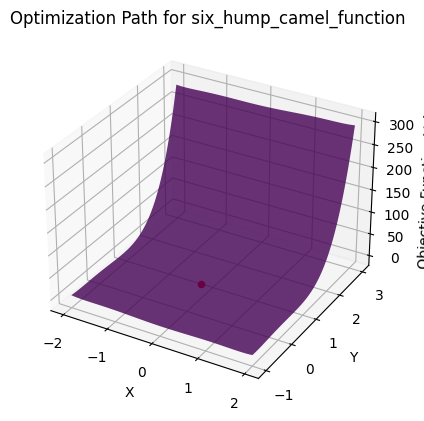


Optimizer: SGD
Optimal values (x, y): -0.0901413 0.7121794
Minimum value of the objective function: -1.0316261
Total number of steps: 133
Optimizer reached the global minimum.


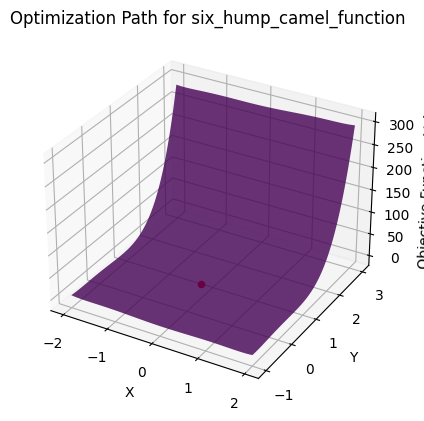


Optimizer: SGD
Optimal values (x, y): -0.08971811 0.7126436
Minimum value of the objective function: -1.0316284
Total number of steps: 91
Optimizer reached the global minimum.


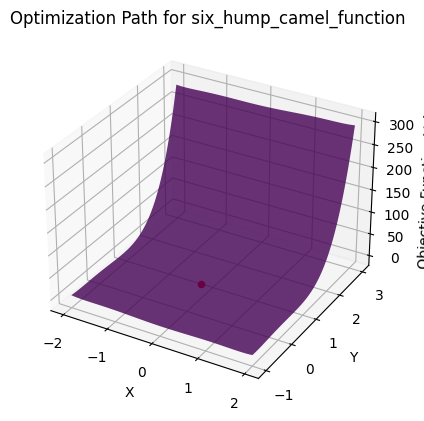


Optimizer: Adagrad
Optimal values (x, y): -0.08366855 0.7121754
Minimum value of the objective function: -1.0314808
Total number of steps: 9224
Optimizer reached the global minimum.


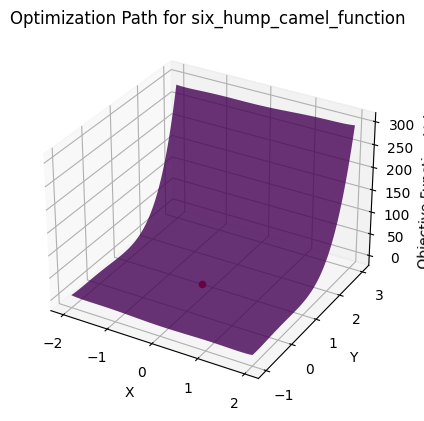


Optimizer: RMSprop
Optimal values (x, y): -0.089724064 0.7121465
Minimum value of the objective function: -1.0316263
Total number of steps: 1132
Optimizer reached the global minimum.


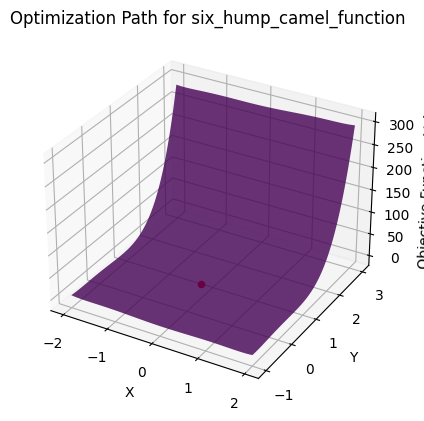


Optimizer: Adam
Optimal values (x, y): -0.08813096 0.7124927
Minimum value of the objective function: -1.0316172
Total number of steps: 2152
Optimizer reached the global minimum.


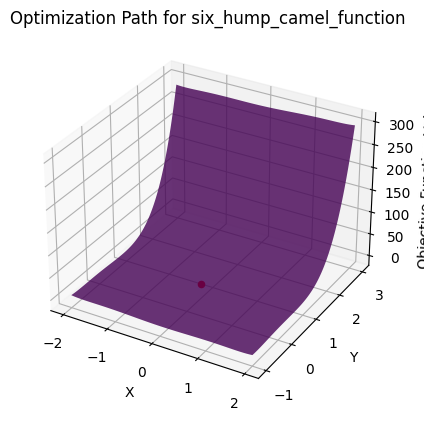


Optimizing function: michalewicz_function

Optimizer: SGD
Optimal values (x, y): 0.41204524 0.28478527
Minimum value of the objective function: -0.09088055
Total number of steps: 1329
Optimizer reached the global minimum.


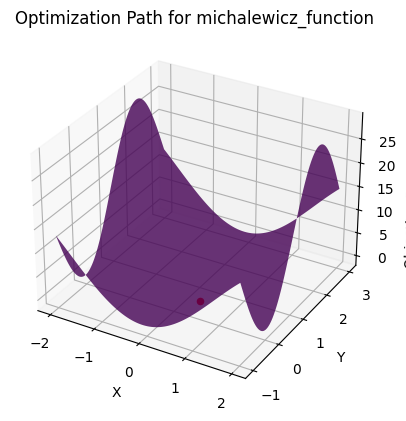


Optimizer: SGD
Optimal values (x, y): -0.42629734 -0.2756481
Minimum value of the objective function: -0.090908065
Total number of steps: 283
Optimizer reached the global minimum.


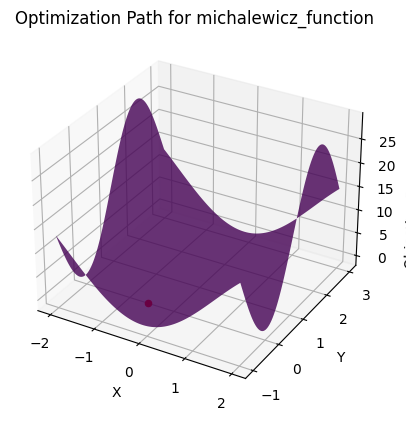


Optimizer: SGD
Optimal values (x, y): -0.42622107 -0.2756964
Minimum value of the objective function: -0.090907976
Total number of steps: 199
Optimizer reached the global minimum.


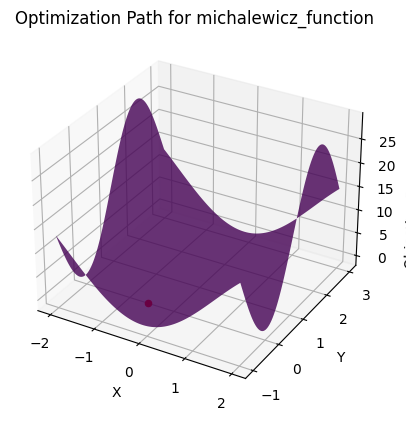


Optimizer: Adagrad
Optimal values (x, y): 0.3751995 0.32604665
Minimum value of the objective function: -0.09032623
Total number of steps: 10000
Optimizer reached the global minimum.


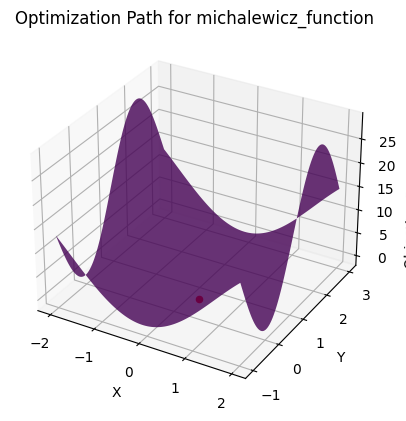


Optimizer: RMSprop
Optimal values (x, y): 0.42989725 0.273934
Minimum value of the objective function: -0.090908766
Total number of steps: 847
Optimizer reached the global minimum.


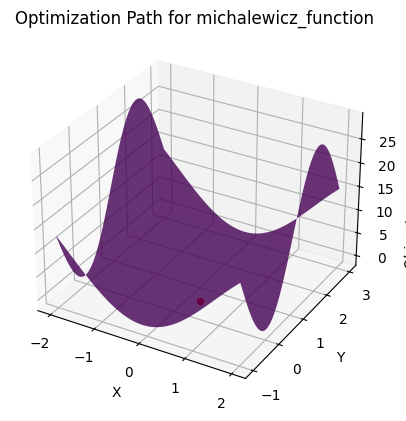


Optimizer: Adam
Optimal values (x, y): 0.3964301 0.2955189
Minimum value of the objective function: -0.090803966
Total number of steps: 3309
Optimizer reached the global minimum.


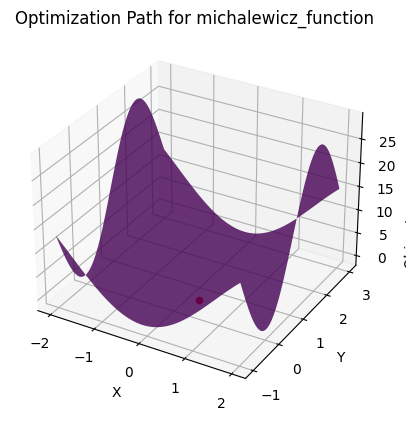

In [ ]:
# the functions to be optimized
def six_hump_camel_function(x, y):
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2

def michalewicz_function(x, y):
    m = 10
    return -tf.sin(x) * tf.sin((y * np.pi) / 2) + m * (1 - tf.cos(x)) * (1 - tf.cos((y * np.pi) / 2))

objective_functions = [six_hump_camel_function, michalewicz_function]

optimizers = [tf.keras.optimizers.legacy.SGD(),
              tf.keras.optimizers.legacy.SGD(momentum=0.9),
              tf.keras.optimizers.legacy.SGD(momentum=0.9, nesterov=True),
              tf.keras.optimizers.legacy.Adagrad(learning_rate=0.01),
              tf.keras.optimizers.legacy.RMSprop(),
              tf.keras.optimizers.legacy.Adam()]

max_steps = 10000

target_error = 1e-13

# Loop through objective functions and optimizers
for objective_function in objective_functions:
    print("\nOptimizing function:", objective_function.__name__)

    x = tf.Variable(initial_value=1.0, dtype=tf.float32)
    y = tf.Variable(initial_value=1.0, dtype=tf.float32)

    for optimizer in optimizers:
        print("\nOptimizer:", optimizer.get_config()["name"])

        x.assign(1.0)
        y.assign(1.0)

        # Custom training loop
        for step in range(max_steps):
            with tf.GradientTape() as tape:
                loss = objective_function(x, y)

            gradients = tape.gradient(loss, [x, y])

            optimizer.apply_gradients(zip(gradients, [x, y]))

            # Stopping criterion
            if step > 0:
                error = tf.abs(loss - prev_loss)
                if error < target_error:
                    break

            prev_loss = loss

        print("Optimal values (x, y):", x.numpy(), y.numpy())
        print("Minimum value of the objective function:", objective_function(x, y).numpy())
        print("Total number of steps:", step + 1)

        if objective_function(x, y) < target_error:
            print("Optimizer reached the global minimum.")
        else:
            print("Optimizer did not reach the global minimum.")

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x_vals = np.linspace(-2, 2, 100)
        y_vals = np.linspace(-1, 3, 100)
        X, Y = np.meshgrid(x_vals, y_vals)
        Z = objective_function(X, Y)
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, rstride=100, cstride=100)
        ax.scatter(x.numpy(), y.numpy(), objective_function(x, y).numpy(), color='red', marker='o')
        ax.set_title(f'Optimization Path for {objective_function.__name__}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Objective Function Value')
        plt.show()


In [ ]:
optimizer = tf.optimizers.SGD()


In [ ]:
optimizer = tf.keras.optimizers.legacy.SGD()

In [ ]:
import tensorflow as tf

In [ ]:
def objective_function_1(x, y):
    return x**2 + y**2

def objective_function_2(x, y):
    return (x - 1)**2 + (y - 2)**2

objective_functions = [objective_function_1, objective_function_2]

optimizers = [tf.compat.v1.keras.optimizers.SGD(),
              tf.compat.v1.keras.optimizers.SGD(momentum=0.9),
              tf.compat.v1.keras.optimizers.SGD(momentum=0.9, nesterov=True),
              tf.compat.v1.keras.optimizers.Adagrad(learning_rate=0.01),
              tf.compat.v1.keras.optimizers.RMSprop(),
              tf.compat.v1.keras.optimizers.Adam()]

max_steps = 10000

target_error = 1e-13

# Loop
for objective_function in objective_functions:
    print("Optimizing function:", objective_function.__name__)

    x = tf.Variable(initial_value=1.0, dtype=tf.float32)
    y = tf.Variable(initial_value=1.0, dtype=tf.float32)

    for optimizer in optimizers:
        print("\nOptimizer:", optimizer.get_config()["name"])

        x.assign(1.0)
        y.assign(1.0)

        # training loop
        for step in range(max_steps):
            with tf.GradientTape() as tape:
                loss = objective_function(x, y)

            gradients = tape.gradient(loss, [x, y])

            optimizer.apply_gradients(zip(gradients, [x, y]))

            # Stopping criterion
            if step > 0:
                error = tf.abs(loss - prev_loss)
                if error < target_error:
                    break

            prev_loss = loss

        print("Optimal values (x, y):", x.numpy(), y.numpy())
        print("Minimum value of the objective function:", objective_function(x, y).numpy())
        print("Total number of steps:", step + 1)


Optimizing function: objective_function_1

Optimizer: SGD
Optimal values (x, y): 1.0591502e-06 1.0591502e-06
Minimum value of the objective function: 2.2435985e-12
Total number of steps: 681

Optimizer: SGD
Optimal values (x, y): 4.821446e-06 4.821446e-06
Minimum value of the objective function: 4.6492685e-11
Total number of steps: 233

Optimizer: SGD
Optimal values (x, y): -5.113692e-07 -5.113692e-07
Minimum value of the objective function: 5.229969e-13
Total number of steps: 206

Optimizer: Adagrad
Optimal values (x, y): 0.012614022 0.012614022
Minimum value of the objective function: 0.0003182271
Total number of steps: 10000

Optimizer: RMSprop
Optimal values (x, y): 2.559824e-08 2.559824e-08
Minimum value of the objective function: 1.3105398e-15
Total number of steps: 1068

Optimizer: Adam
Optimal values (x, y): 1.6609453e-06 1.6609453e-06
Minimum value of the objective function: 5.5174784e-12
Total number of steps: 3668
Optimizing function: objective_function_2

Optimizer: SGD
Opt